<a href="https://colab.research.google.com/github/Ariel3141592/Examen-Recuperacion-Introduccion/blob/main/Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("real_estate_ecuador_200k.csv")
df

Saving real_estate_ecuador_200k.csv to real_estate_ecuador_200k.csv


,Titulo,Precio,Provincia,Lugar,Num. dormitorios,Num. banos,Area,Num. garages
0,Rento Suite 75 metros sector Republica del Sal...,395.66,Pichincha,"Pichincha, Av. Portugal & Av República de El S...",1.0,2.0,65,1.0
1,“Rento departamento en sector la Carolina”,773.69,Pichincha,"Pichincha, Catalina de Aldaz & Av. Portugal, Q...",2.0,2.0,88,1.0
2,Se Renta Amplio Departamento en el Sector de l...,616.94,Pichincha,"Pichincha, Marcos Jofre, Quito, Ecuador",4.0,4.0,214,1.0
3,Hermoso departamento de arriendo de oportunida...,286.69,Pichincha,"Pichincha, De la Prensa Y del Maestro, Quito, ...",2.0,2.0,98,1.0
4,"EN RENTA DEPARTAMENTO, CONJUNTO DIVINO NIÑO",131.54,Pichincha,"Pichincha, Turubamaba, Ecuador",3.0,2.0,53,NaN
...,...,...,...,...,...,...,...,...
199995,DEPARTAMENTO EN SAIBA,465.94,Guayas,"Guayas, Ciudadela Saiba, Guayaquil, Ecuador",2.0,3.0,104,NaN
199996,"Arriendo Departamento 2 Dormitorios, Mañosca",413.17,Pichincha,"Pichincha, Mañosca & Avenida Occidental, Quito...",3.0,3.0,119,1.0
199997,RENTA DEPARTAMENTO PONCIANO ALTO,458.20,Pichincha,"Pichincha,",3.0,2.0,182,1.0
199998,Hermoso departamento de arriendo duplex sector...,380.53,Pichincha,"Pichincha, Ponceano Alto, Quito, Ecuador",2.0,2.0,86,1.0


#***Dashboards:***

##**Gráfico de barras de Precio promedio de alquiler por provincia**

In [6]:
Alquiler_por_Ciudad = df.groupby("Provincia")["Precio"].mean()
print("El costo de alquiler por Provincia es:")
Alquiler_por_Ciudad

El costo de alquiler por Provincia es:


,Precio
Provincia,
Cotopaxi,1814.528859
El Oro,124.352068
Esmeraldas,327.772537
Guayas,614.669888
Imbabura,480.809447
Los Rios,233.589620
Manabí,6503.102091
Orellana,149.863608
Pichincha,734.507750


##Por ciudad

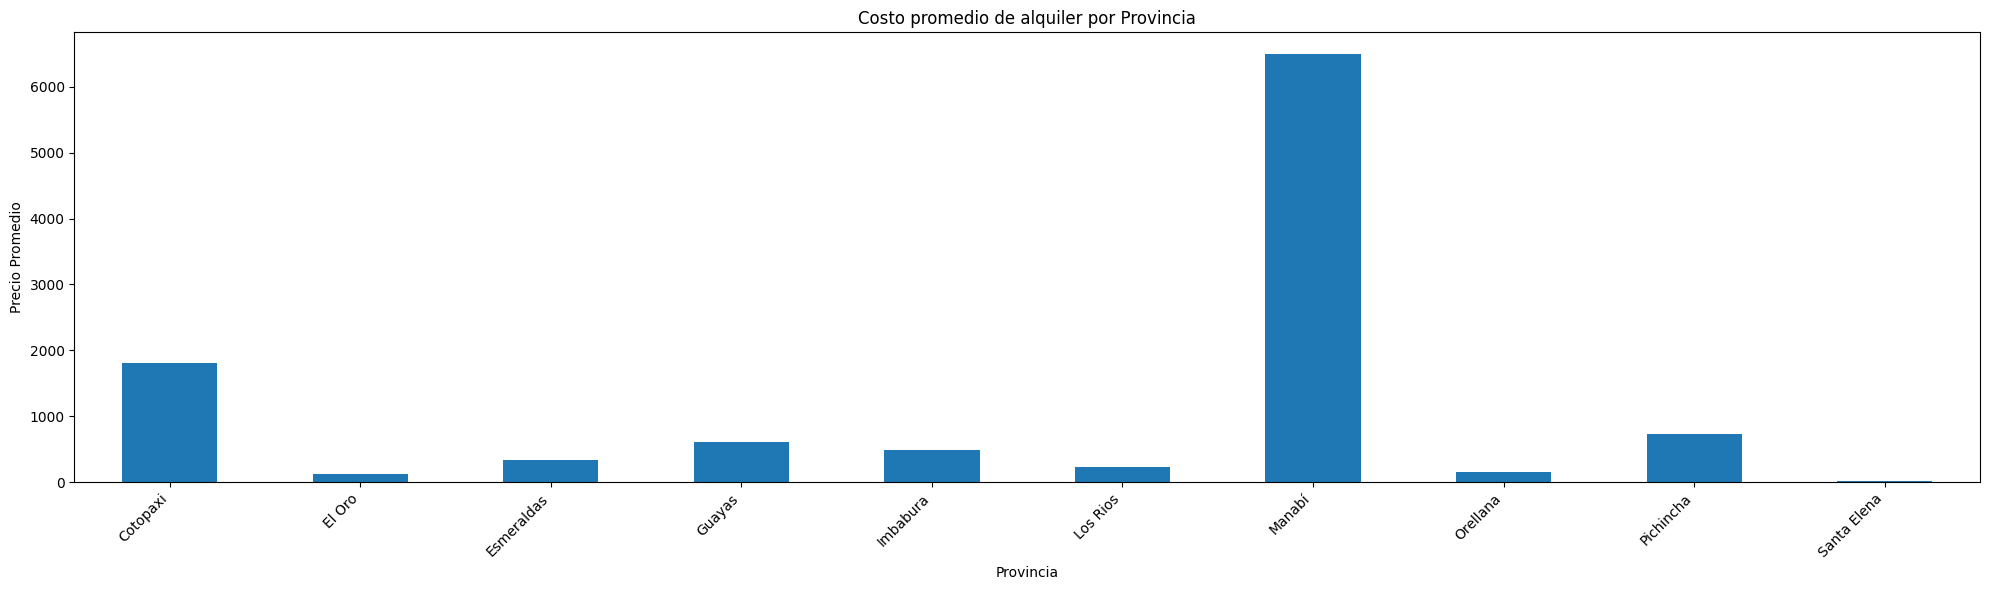

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
Alquiler_por_Ciudad.plot(kind='bar')
plt.title('Costo promedio de alquiler por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Gráfico de barras del Total de propiedades por Provincia**

In [12]:
import numpy as np

def get_property_type(title):
    title = str(title).lower()
    if 'departamento' in title:
        return 'Departamento'
    elif 'casa' in title:
        return 'Casa'
    elif 'suite' in title:
        return 'Suite'
    elif 'local comercial' in title or 'comercial' in title:
        return 'Local Comercial'
    elif 'oficina' in title:
        return 'Oficina'
    elif 'terreno' in title:
        return 'Terreno'
    elif 'villa' in title:
        return 'Villa'
    elif 'bodega' in title:
        return 'Bodega'
    else:
        return 'Otros'

df['Tipo de Propiedad'] = df['Titulo'].apply(get_property_type)

Tipo_De_Propiedad = df['Tipo de Propiedad'].value_counts()
Tipo_De_Propiedad

,count
Tipo de Propiedad,
Departamento,86424
Suite,24640
Oficina,23454
Otros,21966
Casa,20174
Local Comercial,17423
Bodega,4265
Villa,1244
Terreno,410


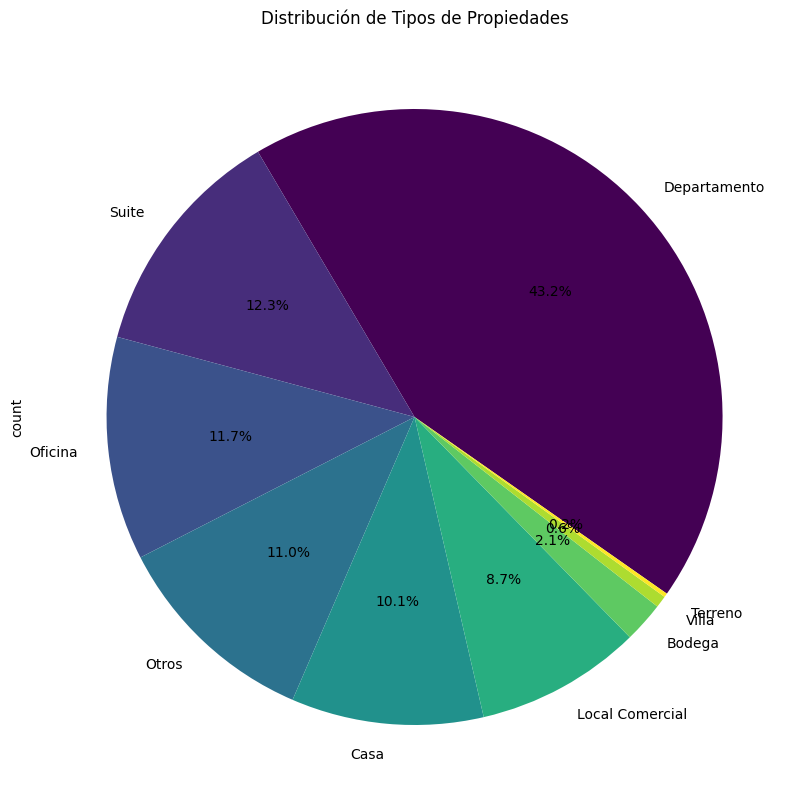

In [47]:
plt.figure(figsize=(20, 10))
Tipo_De_Propiedad.plot(kind='pie', autopct='%1.1f%%', startangle=-35, cmap='viridis')
plt.title('Distribución de Tipos de Propiedades')
plt.show()

##**Premium por habitacion adicional**

In [33]:
Precio_habitaciones = df.groupby('Num. dormitorios')['Precio'].mean().sort_index()

Premium_por_Habitaciones_Adicionales = {}
for i in range(1, len(Precio_habitaciones)):
    numero_habitaciones = Precio_habitaciones.index[i]
    Numero_habitaciones_previas = Precio_habitaciones.index[i-1]

    if Numero_habitaciones_previas + 1 == numero_habitaciones:
        price_diff = Precio_habitaciones.iloc[i] - Precio_habitaciones.iloc[i-1]
        Premium_por_Habitaciones_Adicionales[f'{int(Numero_habitaciones_previas)} vs {int(numero_habitaciones)} dormitorios'] = price_diff

Premium_series = pd.Series(Premium_por_Habitaciones_Adicionales)
Premium_diferencias = Premium_series.abs()
Premium_diferencias

,0
1 vs 2 dormitorios,87.148764
2 vs 3 dormitorios,95.253816
3 vs 4 dormitorios,481.334452
4 vs 5 dormitorios,234.446957
5 vs 6 dormitorios,199.206322
6 vs 7 dormitorios,1228.419473
7 vs 8 dormitorios,1888.112427
8 vs 9 dormitorios,443.386277
9 vs 10 dormitorios,279.339615
10 vs 11 dormitorios,13.878501


##Precios todos positivos para un grafica de pastel

##Barras

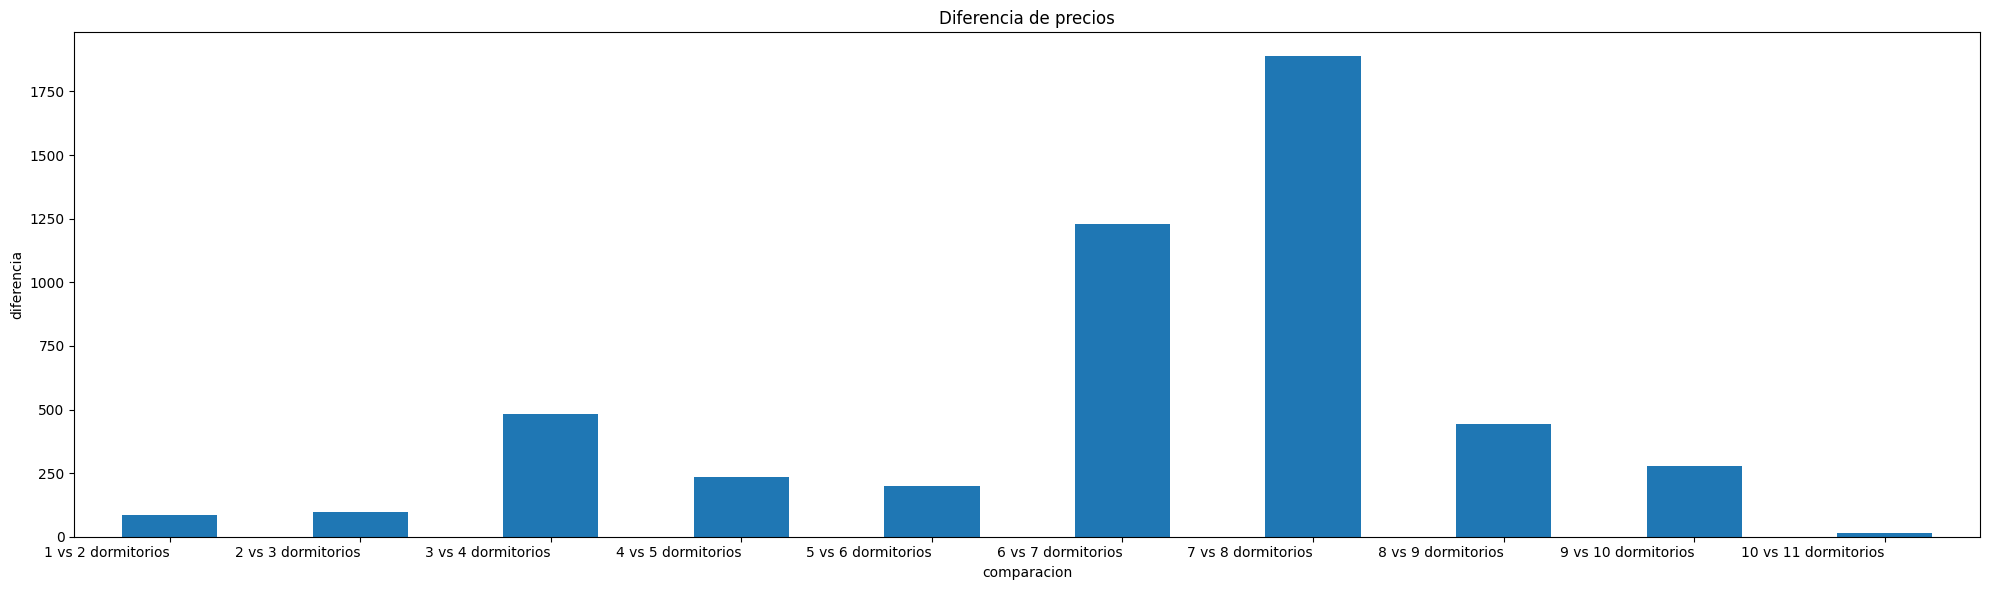

In [34]:
plt.figure(figsize=(20, 6))
Premium_diferencias.plot(kind='bar')
plt.title('Diferencia de precios')
plt.xlabel('comparacion')
plt.ylabel('diferencia')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

##Pastel

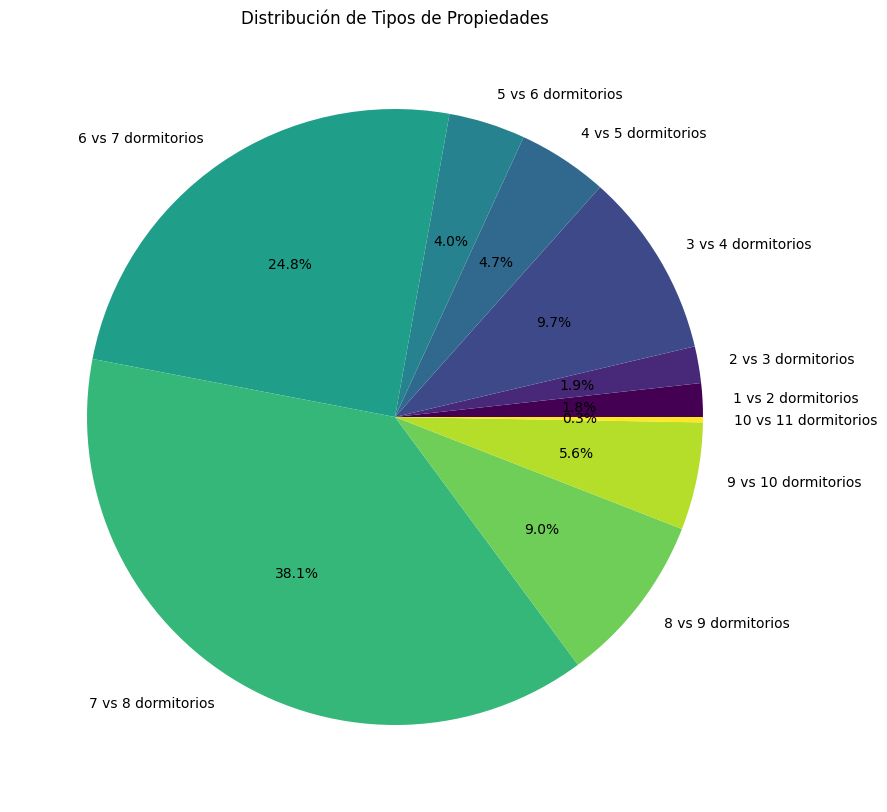

In [36]:
plt.figure(figsize=(20, 10))
Premium_diferencias.plot(kind='pie', autopct='%1.1f%%', startangle=0, cmap='viridis')
plt.title('Distribución de Tipos de Propiedades')
plt.show()

#**Area vs precio**

In [38]:
def get_property_type(title):
    title = str(title).lower()
    if 'departamento' in title:
        return 'Departamento'
    elif 'casa' in title:
        return 'Casa'
    elif 'suite' in title:
        return 'Suite'
    elif 'local comercial' in title or 'comercial' in title:
        return 'Local Comercial'
    elif 'oficina' in title:
        return 'Oficina'
    elif 'terreno' in title:
        return 'Terreno'
    elif 'villa' in title:
        return 'Villa'
    elif 'bodega' in title:
        return 'Bodega'
    else:
        return 'Otros'

df['Tipo de Propiedad'] = df['Titulo'].apply(get_property_type)

Distribucion_de_Propiedad = df['Tipo de Propiedad'].value_counts()
Distribucion_de_Propiedad

,count
Tipo de Propiedad,
Departamento,86424
Suite,24640
Oficina,23454
Otros,21966
Casa,20174
Local Comercial,17423
Bodega,4265
Villa,1244
Terreno,410


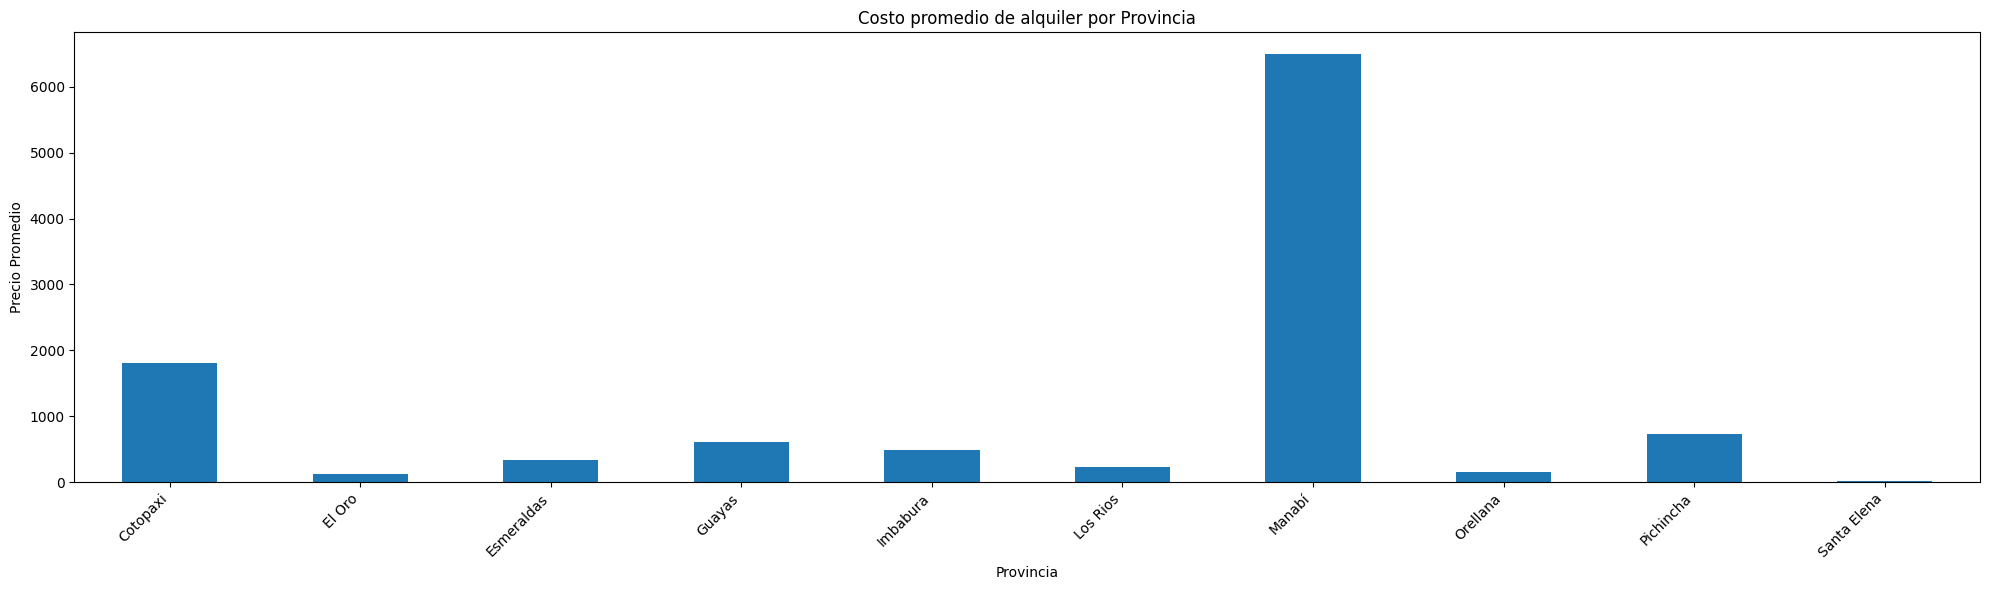

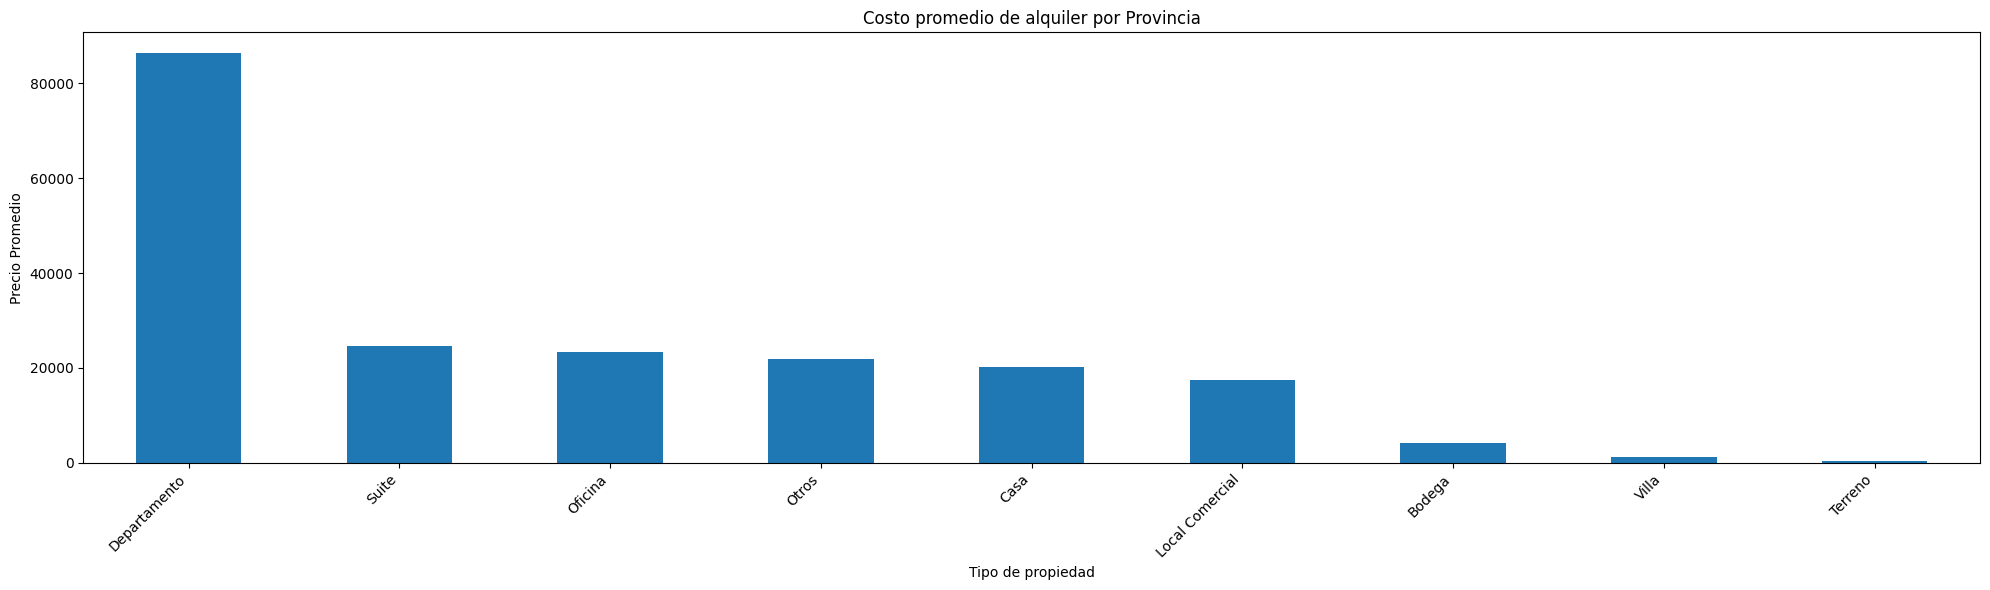

In [42]:

plt.figure(figsize=(20, 6))
Alquiler_por_Ciudad.plot(kind='bar')
plt.title('Costo promedio de alquiler por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 6))
Distribucion_de_Propiedad.plot(kind='bar')
plt.title('Costo promedio de alquiler por Provincia')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()